# Language Modeling 

- Predicting the next word in the sentence
- Developed for a different languages 
- What word is likely to appear next?

<b> Example </b>

- I'd like to make a collect... 
    
        "call" is one prediction you can make, which means it may have a higher probability to be selected
        
<b> Training Corpus</b> 

- a collection (finite set) of text that we use to find probability distributions over the set of sentences in the corpus 

<b> Goal when training a language model </b>

- assigning higher probability to sentences that are more likely 
- assigning lower probability to sentences that are less likely 

<b> In The previous Jupyter Book we got the probability distribution of a vocab set like the example below</b> 

Random Variables w can take one of these 5 values in the vocab set

vocabulary = {cat, dog, a, the, of}
               
             <.4, .3, .1, .1, .1> 
             

<b>Now we will get distributions of sentences over a training corpus</b>

Essentially, this means that if we had a corpus with 5 sentences, we would have to train a model that predicts words in each sentence and assign a probability that each sentence appears in a corpus. 

For example: 
- I'd like to make a collect...
OR
- collect a make call I'd like to... 

Which is more likely to be represented in the english language as a valid sentence? 

Remember that since we are are getting a probability distribution of sentences, the sum of all sentences together should equal 1. 

<b>Distribution of each sentences</b>

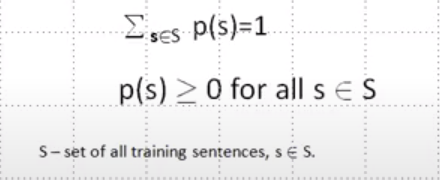

# How To Train Your Language Model

<b>Naïve Language Model (Not the best model)</b>

- This approach computes the number of times a sentence occurs in a corpus
- We then say that the probability of a sentence is the count of a sentence divided by the total amount of sentences

Let S be the set of sentences and s be a singular sentence: 

P(s) = Count(s)/S

This isn't the best because each sentence is treated as one word which is bad because we have limitations and underestimations in a language model. Remember a language model is used to predict that probability of a word or sentence occuring in a language. 

This will be a problem because it cannot determine the probabililty of new sentences. This means that there is no good generalization for new sentences. 

<b>Let's look at a different approach</b>

We will take our first example sentence

- I'd like to make a collect...

And tokenize it to compute the probabiilty distribution

- p(s) = p(I, would, like, to, make, a, collect, call)

We would like to estimate the probabilty of this sentence. In this example we will take the joint probability of all words occuring in this sentence.

One thing before computing p(s)... we need to learn the chain rule

<b> Chain rule </b>

- The chain rule allows you to use joint probability to estimate the probability of tokens or variables that occur in order.

Recall: P(A,B) = P(A) * P(B|A). Do you remember what this formula is? It's the <b>PRODUCT RULE</b> P(A^B) = P(A) * P(B|A)
    
Okay, so we have P(A,B) = P(A)* P(B|A)... but what about:

- P(A,B,C)??? 

That's easy because using the chain rule we can compute the product of all this way: 

- P(A,B,C) =  P(A)* P(B|A) * P(C| A,B) 

Another way to write this is:

- P(A,B,C) =  P(B)* P(A|B) * P(C| A,B) 

or 

- P(A,B,C) =  P(C)* P(A|C) * P(B| A,C)



<b> Back to our tokenized example using the chain rule</b>

- p(s) = p(I, would, like, to, make, a, collect, call)


<b>p(I, would, like, to, make, a, collect, call)</b>=
<br>
<br>p(I) x 
<br>p(would|I) x 
<br>p(like|I, would) x 
<br>p(to| I, would, like) x 
<br>p(make| I, would, like, to) x 
<br>p(a| I, would, like, to, make) x 
<br>p(collect|I, would, like, to, make, a) x 
<br>p(call|I, would, like, to, make, a, collect)
    
This is the chain rule being applied to get the probability of all these words
    
<b> Let's get an estimate of each probability </b>

<br> <b>p(I) = ???</b>
- simply put, it's just count(i)/Total_Words

<br><b> p(would|I) = </b>
- in order to calculate this, we have to come up with a training corpus with more sentences that start with "I"


- Example sentences starting with "I" in the training corpus: 


    - I would 4
    - I am 20
    - I can 10
    - I should 15
    - I may 3
    - I like 5
- Total sentences starting with "I" = 57


    So the probability of (would|I) = 4/57

<br><b>p(like|I, would) =</b>

<br><b>p(to| I, would, like) =</b>

<br><b>p(make| I, would, like, to) =</b>

<br><b>p(a| I, would, like, to, make) =</b>

<br><b>p(collect|I, would, like, to, make, a) =</b>

<br><b>p(call|I, would, like, to, make, a, collect) =</b>
 
    

P(call|I would like to make a collect) = count( I would like to make a collect call)/count(I would like to make a collect)

P(would|I) P(call| collect)

The longer the sequence, the more likely we haven't seen it

How many sequences of length 3 = |v|^3 
How many sequences of length 2 = |v|^2 
How many sequences of length 1 = |v|^1 

<h1>Markov Process </h1>

- Indepent assumption solves our problem because we can look at one word and make a good guess
- I don't need to look at N previous words, I just need to look at one previous word. 


<b>First-order Markov Process</b>

    - Bigram 
    - First order independent assumption (one previous)

        p(I) x 
        p(would|I) x 
        p(like | would) x 
        p(to | like) x 
        p(make | to) x 
        p(a | make) x 
        p(collect | a) x 
        p(call | collect)
    
 <b>Second-order Markov Process</b>
        
        - Trigram 
        - Independence assumption 

        p(I) x 
        p(would|I) x 
        p(like |I, would) x 
        p(to | would, like) x 
        p(make | like,to) x 
        p(a | to, make) x 
        p(collect |make, a) x 
        p(call | a,collect)
        
unigram - 100 parameters = 100 
bigram  - 100 parameters = 100^2
trigram - 100 parameters = 100^3
        
Moving from unigram -> Trigram means that you're creating more complex 

# Example Trigram with starting tags

    <s> I would like to make a collect call </s> 

    Trigram language model: 
    p(s) = p(i|<s>)*p(would|I,<s>)*p(like|I would) * p(...)*p(</s>|collect call)


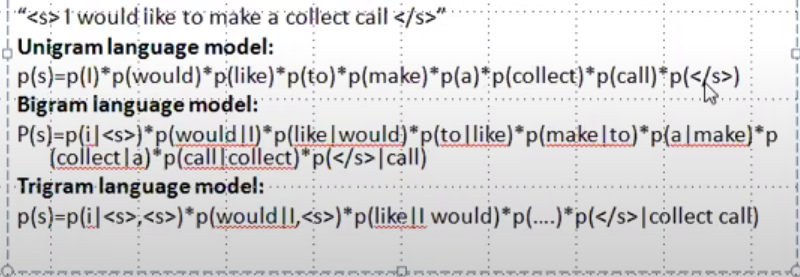